In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns



In [4]:
#Importing and Loading the dataset
# Reading anime.csv
anime = pd.read_csv("anime.csv")


In [5]:
# Displaying the number of rows and columns in the dataset
anime.shape

(12294, 7)

In [6]:
# Display the first five instances of the datset
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
# Reading the rating.csv
rating = pd.read_csv("rating.csv")

In [10]:
# Displaying the numbers of rows and columns in the dataset
rating.shape

(7813737, 3)

In [11]:
# Displaying the first five instances of the dataset
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [12]:
#Exploratory Data Analysis
# Handling null values in anime.csv
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [13]:
# Removing the null values from the dataset
anime = anime.dropna()

In [14]:
# Checking if the null values are removed
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [15]:
# Checking for null values in rating.csv file
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [16]:
# Filtering out the required columns from anime.csv
selected_cols = ['anime_id', 'name', 'genre','rating', 'members']

In [17]:
# Displaying the first few instances of the new dataset
anime[selected_cols].head()

,anime_id,name,genre,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,151266


In [51]:
# Visualizing the Dataset
# Create a DataFrame
anime_df = pd.DataFrame(anime)

In [52]:
# Set the figure size
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Anime Ratings')

E:\anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from current font.
  func(*args, **kwargs)
E:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


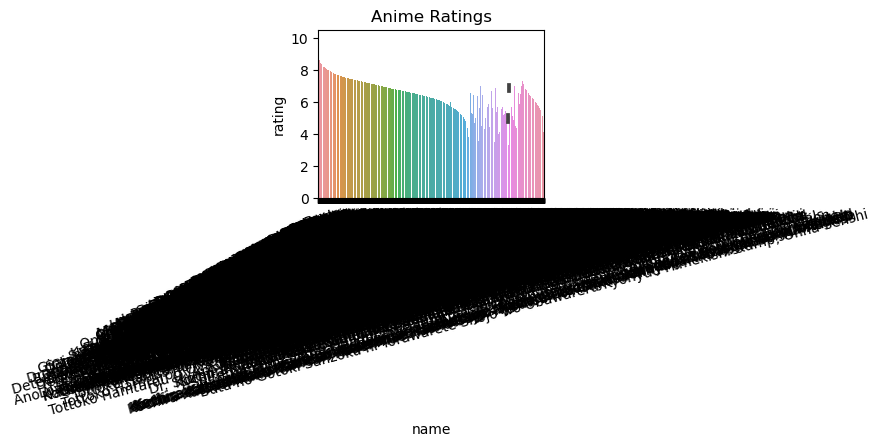

In [53]:
# Bar Chart for Ratings
plt.subplot(2, 2, 1)
sns.barplot(x='name', y='rating', data=anime_df)
plt.xticks(rotation=15)
plt.title('Anime Ratings')

Text(0.5, 1.0, 'Genre Counts')

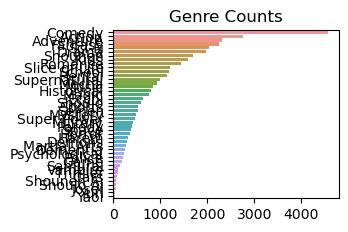

In [54]:
# Bar Chart for Genre Counts
plt.subplot(2, 2, 2)
genre_counts = anime_df['genre'].str.split(', ').explode().value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, orient='h')
plt.title('Genre Counts')


Text(0.5, 1.0, 'Ratings vs. Members')

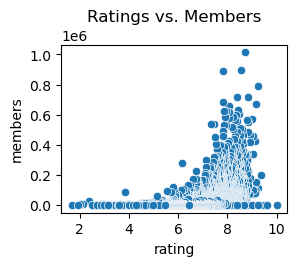

In [55]:
# Scatter Plot for Ratings vs. Members
plt.subplot(2, 2, 3)
sns.scatterplot(x='rating', y='members', data=anime_df)
plt.title('Ratings vs. Members')

Text(0.5, 1.0, 'Rating Distribution')

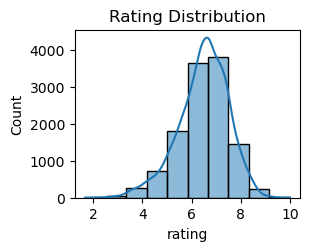

In [23]:
# Histogram for Rating Distribution
plt.subplot(2, 2, 4)
sns.histplot(anime_df['rating'], bins=10, kde=True)
plt.title('Rating Distribution')

In [56]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

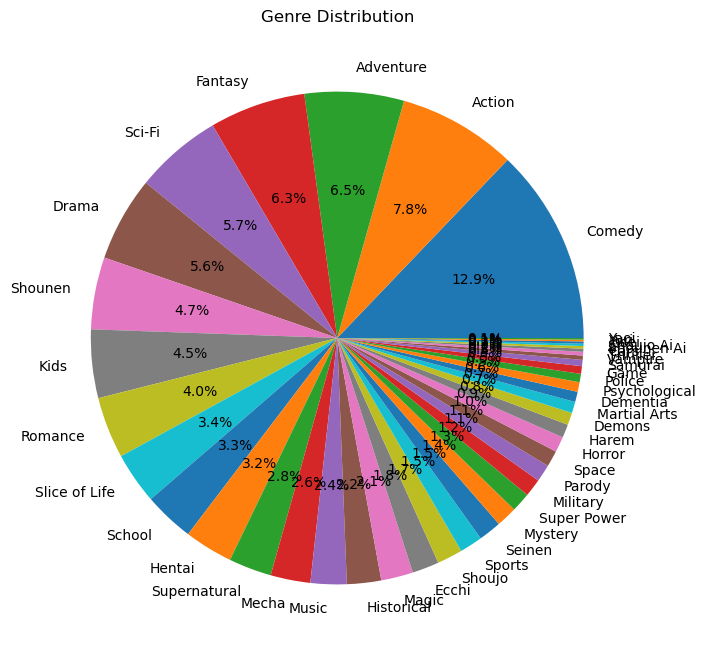

In [25]:
# Pie Chart for Genre Distribution
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Genre Distribution')
plt.ylabel('')
plt.show()

In [57]:
#Data Pre-processing
# Merging anime.csv and ratings.csv using anime_id
merged_df = pd.merge(anime, rating, on='anime_id', how='inner')

In [27]:
# Displaying the first five instances of the merged dataset
merged_df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [28]:
# Checking for null values
merged_df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [29]:
# Filtering out the required columns from the given dataset
new_df = pd.DataFrame(merged_df)

In [30]:
# Specify the columns you want to keep
columns_to_keep = ['user_id','name','anime_id', 'genre','rating_y']

In [31]:
# Displaying the first few instances of the new dataset
new_df[columns_to_keep].head()

,user_id,name,anime_id,genre,rating_y
0,99,Kimi no Na wa.,32281,"Drama, Romance, School, Supernatural",5
1,152,Kimi no Na wa.,32281,"Drama, Romance, School, Supernatural",10
2,244,Kimi no Na wa.,32281,"Drama, Romance, School, Supernatural",10
3,271,Kimi no Na wa.,32281,"Drama, Romance, School, Supernatural",10
4,278,Kimi no Na wa.,32281,"Drama, Romance, School, Supernatural",-1


In [32]:
# Checking the datatype of the values in the dataset
new_df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating_x    float64
members       int64
user_id       int64
rating_y      int64
dtype: object

In [33]:
#Label Encoding
df = pd.DataFrame(new_df)

In [34]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()


In [58]:
# Apply label encoding to relevant columns
columns_to_encode = ['anime_id', 'name', 'genre', 'rating_y']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [36]:
# Display the first few instances of the updated dataset
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,10747,4930,2608,Movie,1,9.37,200630,99,5
1,10747,4930,2608,Movie,1,9.37,200630,152,10
2,10747,4930,2608,Movie,1,9.37,200630,244,10
3,10747,4930,2608,Movie,1,9.37,200630,271,10
4,10747,4930,2608,Movie,1,9.37,200630,278,0
